# TBAI Capacitance Calcs # 

This script calculates the depletion widths and dominant contributions to junction capacitance



In [1]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [2]:
import numpy as np
import lmfit as lmf
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import os
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
%matplotlib inline

#to make fonts from plots look normal
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Calibri'
mpl.rcParams['mathtext.it'] = 'Calibri:italic'
mpl.rcParams['mathtext.bf'] = 'Calibri:bold'

font = {'family' : 'Calibri',
        'weight' : 'normal',
        'size'   : 36}
        #'sans-serif' : 'Arial Unicode MS'}
mpl.rc('font', **font)
plt.rc('font', size=36)          # controls default text sizes

#mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally
mpl.rcParams['lines.markersize'] = 16
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
#mpl.rcParams['xtick.top'] = False
#mpl.rcParams['ytick.right'] = False



In [3]:
# PbS capacitance

# area in cm^2
area = 4e-2

eps0 = 8.854e-14

# MPA params (t = thickness in cm)
eps1 = 10
t1 = 4.0e-6

# TBAI params (t = thickness in cm)
eps2 = 18
t2 = 1.80e-5

Ct_inv = t1/(eps1*eps0*area) + t2/(eps2*eps0*area) 
print(Ct_inv)

Ct = 1/Ct_inv

print(Ct)

395301558.617574
2.5297142857142857e-09


In [26]:
# ZnO capacitance

# total freeze out capacitance in F
Ctot = 1.46e-9

Cz_inv = (1/Ctot) - (1/Ct)

Cz = 1/Cz_inv
print((Cz*1e9)/4e-2)

#ZnO params 
eps3 = 3.7

# solve for ZnO depletion thickness 
t3 = (eps3*eps0*area)/Cz
print(t3)

86.3170405982906
3.7952876712328766e-06


In [5]:
# TBAI only capacitance
Ct2= (eps2*eps0*area)/t2
print(Ct2)

# MPA only capacitance
Ct1 = (eps1*eps0*area)/t1
print(Ct1)

print((Ct1*1e9)/area)
print((Ct2*1e9)/area)


3.5415999999999994e-09
8.854e-09
221.34999999999997
88.53999999999998


In [6]:
# solve for depletion capacitance assuming C_{if} is PbS depletion in TBAI
Cd = 100*1e-9*area
# print(Cd)

# solve for depletion capacitance PbS, assuming it drops across TBAI
d2 = (eps2*eps0*area)/Cd
print(d2)

# calculate what capacitance would be for fully depleted TBAI layer
Cd_full = (eps2*eps0*area)/1.8e-5
print(Cd_full)

print((Cd_full*1e9)/4e-2)

1.5937199999999997e-05
3.5415999999999994e-09
88.53999999999998


In [7]:
# solve for d2 depletion width

#max capacitance on d2 
Cd2_max = 72*4e-2*1e-9

d2_d = (eps0*eps1*area)/Cd2_max

print(d2_d)


1.2297222222222221e-05


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


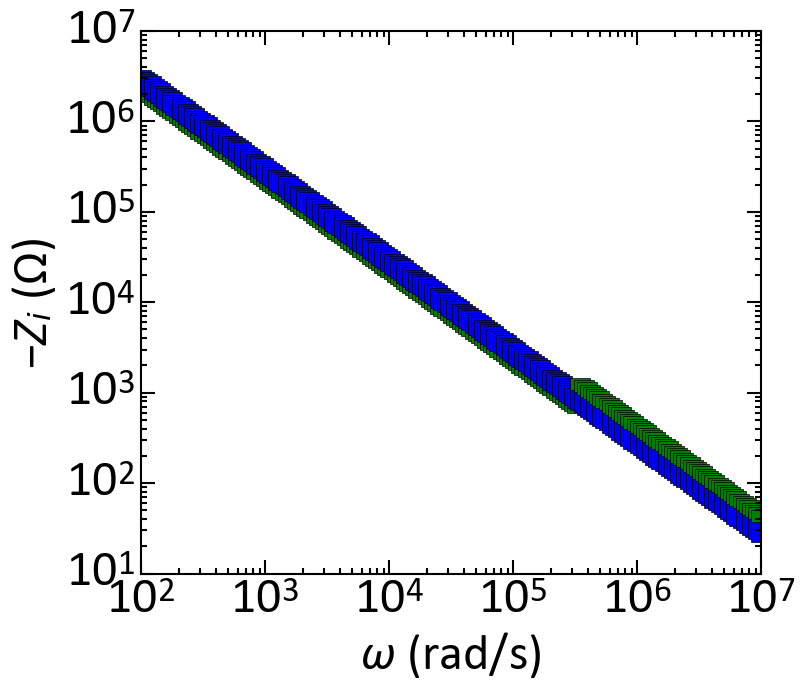

In [8]:
# run a very simple simulation of capacitance

figDir = r'C:\Users\Eric\Desktop\Lab_Work\admittance\ligand_and_interface\ligand_manuscript\currentVersion\TBAI\TAS\impedanceCalcs'

# frequency array
w = np.logspace(2,7,200)

# depletion capacitance of tbai before freeze-out in nanofarads/cm^2
# Cp1 = (4e-9*1e9)/4e-2
Cp1 = 4e-9
# print(Cp1)

# geometric capacitance of tbai and mpa after freeze-out in nanofarads/cm^2
# Cp2 = (Ct*1e9)/4e-2
Cp2 = Ct
# print(Cp2)

# depletion capacitance of ZnO
# Cz1 = (Cz*1e9)/4e-2
Cz1 = Cz

# print(Cz1)

# freeze-out frequency (approximate) in rad/s
omegaD = 3.4e5

Zi = np.zeros(len(w))
omegaD_idx = np.where(w >=omegaD)[0][0]

Z1 = np.zeros(len(w))
Z2 = np.zeros(len(w))

for freq in range(0,len(w)):
    Z2[freq] = np.imag(1/(1j*w[freq]*Cz))
    
    if freq < omegaD_idx:
        Z1[freq] = np.imag(1/(1j*w[freq]*Cp1))
    elif freq >= omegaD_idx:
        Z1[freq] = np.imag(1/(1j*w[freq]*Cp2))

Zi = Z1+ Z2
        
fig,ax = plt.subplots(1,1, figsize = (8,7))
for freq in range(0,len(w)):
    ax.plot(w[freq],-Z1[freq],'s',markersize = 15,c = 'g')
    ax.plot(w[freq],-Z2[freq],'s',markersize = 15,c = 'b')
#     ax.plot(w[freq],-Zi[freq],'o',markersize = 10)
    
# ax.plot(w[omegaD_idx],-Zi[omegaD_idx],'o',markersize = 30)
ax.set_xlabel("$\\omega$ (rad/s)")
ax.set_ylabel("$-Z_{i}$ ($\\Omega$)")
ax.set_xscale('log')
ax.set_yscale('log')
# figName = '\\ZiCalc.png'
# plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')
    

In [9]:
# assume Ct drops only across TBAI. how large is the depletion region?

epsTest = 11.2

Dtest1 = (epsTest*eps0*4e-2)/(Ct)
print(Dtest1)

# 250 nm....clearly not only ZnO

1.568e-05


In [10]:
3.45/4e-2

86.25

In [11]:
# solve for TBAI depletion layer assuming C_{D} has both ZnO and PbS contributions
print(Cd)
print(Cz)

Cpbs2_inv = 3.0e-6/(eps2*eps0*area)

Cpbs2 = 1/Cpbs2_inv
print(Cpbs2)
print((Cpbs2*1e9)/4e-2)

Ctest_inv = Cpbs2_inv + 1/Cz

Ctest = 1/Ctest_inv
print(Ctest)

print((Ctest*1e9)/4e-2)

4e-09
3.452681623931624e-09
2.1249599999999997e-08
531.2399999999999
2.9700942023435707e-09
74.25235505858927


In [12]:
print(eps2)

18


In [13]:
q = 1.602e-19
eps0b = 8.854e-12
kBj = 1.38e-23
LdT = 30e-9

Nd_test = (eps2*eps0b*kBj*300)/((q**2)*(LdT**2))
print(Nd_test*1e-6)

2.8565697372666196e+16


In [14]:
#assume maximal capacitance is due to TBAI and small MPA depletion region. what do we get?

#maximal ow frequency day 2 capacitance in F 
Cd2 = (72*1e-9)*4e-2
# print(Cd2)
# print()

Ct2_inv = (1/Cd2) - t2/(eps2*eps0*area) 
# print(Ct_inv)

Ct2 = 1/Ct2_inv
print(Ct2)
print((Ct2*1e9)/4e-2)

t1_est = (eps0*eps1*area)/Ct2
print(t1_est)

# print(((1/(t2/(eps2*eps0*area)))*1e9)/4e-2)


# print(((1/(t1/(eps1*eps0*area)))*1e9)/4e-2)

# we get a 23 nm depletion region in MPA. Fair enough. 


1.541688029020558e-08
385.42200725513953
2.2972222222222192e-06


In [15]:
# solve for full TBAI depletion
Ctb = (eps2*eps0*area)/1.8e-5
print(Ctb)


# assume a 23 nm MPA capacitance. just to check, what's the total capacitance?

Call_inv = Ct2_inv + Cz_inv + (1/Ctb)
Call = 1/Call_inv

print((Call*1e9)/4e-2)

print(Ct2)
print(Cz)
print(Ctb)



3.5415999999999994e-09
39.25557791878044
1.541688029020558e-08
3.452681623931624e-09
3.5415999999999994e-09


In [16]:
# now assume 40 nm ZnO and 180 nm of TBAI frozen out. what do we get? 


Call_inv2 = Cz_inv + (1/Ctb)
Call2 = 1/Call_inv2

print((Call2*1e9)/4e-2)

#this is precisly where cusp is. so, seems like this where depletion in TBAI/ZnO cuts out, and we see only 23 nm of depletion
# in MPA. Note, adding the extra depletion of MPA gives us the extra bit

43.70719502299161


In [22]:
# solve for equivalent epsilon to use in DLCP calculations for day 2 

print(Call2)
eps_equiv = (2.2e-5*Call2)/(eps0*area)
print(eps_equiv)


1.7482878009196645e-09
10.860156883959968
8.854e-14
0.04


In [23]:
270e-6/(np.pi*.15**2)

0.003819718634205488

In [24]:
(750/600) * 3.8

4.75

In [25]:
(900/600) * 3.8

5.699999999999999

In [29]:
fmpa = 2.6e6/(2*np.pi)

In [30]:
q

1.602e-19

In [33]:
eps0

8.854e-14

In [35]:
# estimate mobility in MPA via freeze out at RT 

# (eps1*eps0*4*fmpa)/(q*1e17*2)
(eps1*eps0*260*2.6e6)/(q*1e17*240)

0.00015567270079067832